In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2024-02-05 07:08:58--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.161.153, 3.5.29.219, 52.217.196.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.161.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  78.6MB/s    in 3m 53s  

2024-02-05 07:12:51 (79.3 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2024-02-05 07:12:51--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.62.169, 52.217.170.49, 52.216.169.227, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.62.169|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[======

In [ ]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_train_path = "./coco_train2017"
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
extract_zip_file(extract_train_path)
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [ ]:
!pip install pycocotools

## This code displays images along with their caption and classes

<ipython-input-8-cbbad946cb98>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


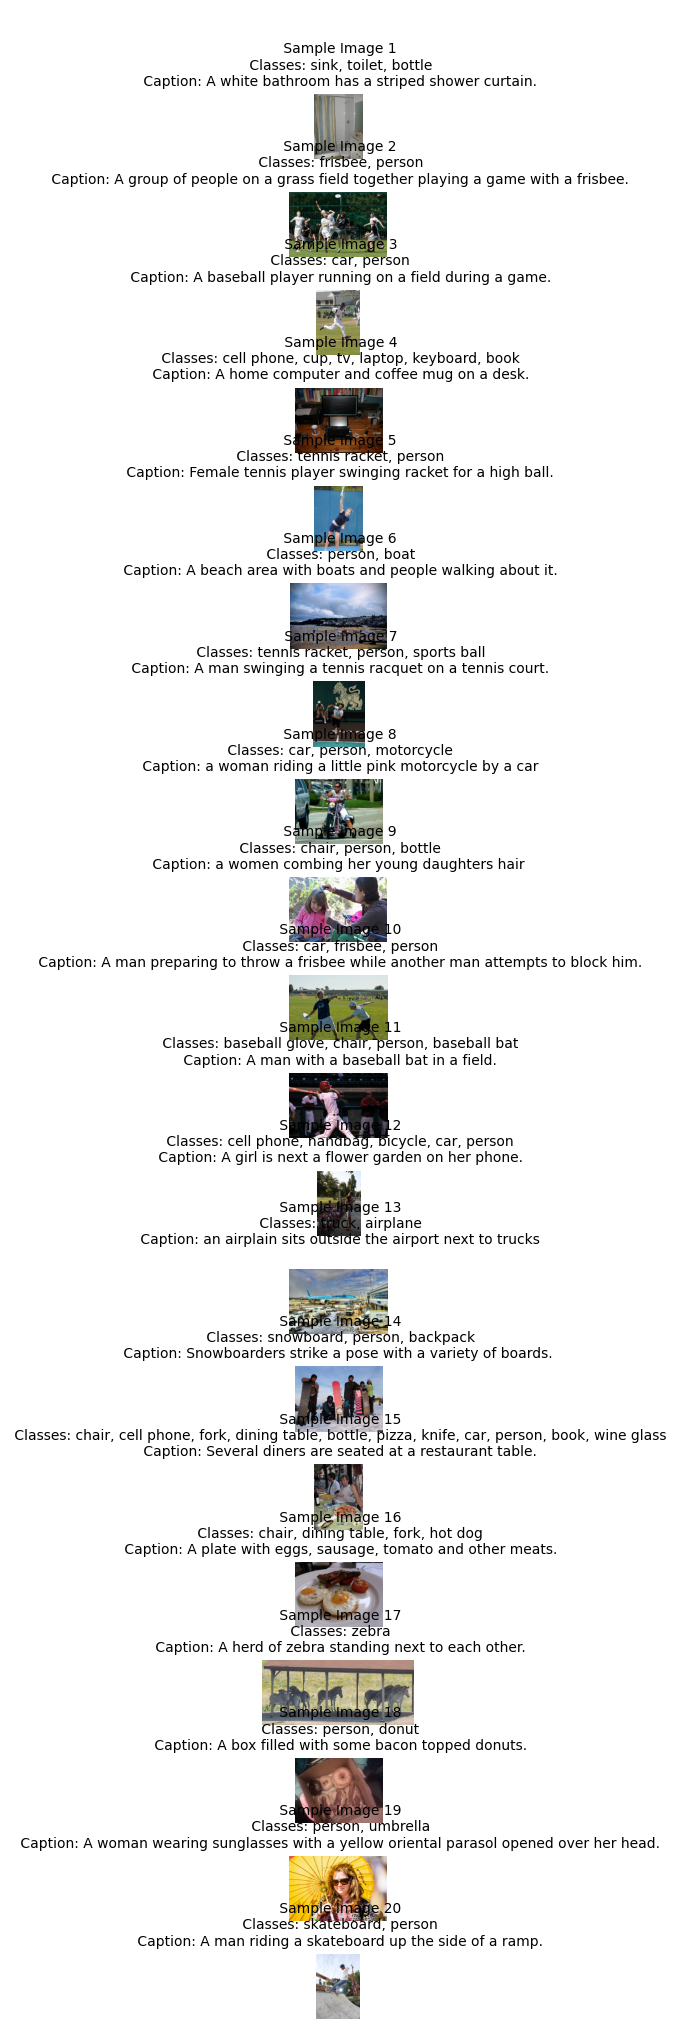

Captions Array:
['A white bathroom has a striped shower curtain.', 'A group of people on a grass field together playing a game with a frisbee.', 'A baseball player running on a field during a game.', 'A home computer and coffee mug on a desk.', 'Female tennis player swinging racket for a high ball.', 'A beach area with boats and people walking about it.', 'A man swinging a tennis racquet on a tennis court.', 'a woman riding a little pink motorcycle by a car', 'a women combing her young daughters hair ', 'A man preparing to throw a frisbee while another man attempts to block him.', 'A man with a baseball bat in a field.', 'A girl is next a flower garden on her phone.', 'an airplain sits outside the airport next to trucks\n', 'Snowboarders strike a pose with a variety of boards. ', 'Several diners are seated at a restaurant table.', 'A plate with eggs, sausage, tomato and other meats.', 'A herd of zebra standing next to each other.', 'A box filled with some bacon topped donuts.', 'A woma

In [ ]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

# Path to the MS COCO annotations files
annotations_file = '/content/coco_ann2017/annotations/captions_train2017.json'
annotation_classes_file = '/content/coco_ann2017/annotations/instances_train2017.json'

# Path to the directory containing images
images_dir = '/content/coco_train2017/train2017'

# Number of samples to display
num_samples = 20

# Load annotations file
with open(annotations_file, 'r') as f:
    annotations = json.load(f)

# Load annotation classes file
with open(annotation_classes_file, 'r') as f:
    classes = json.load(f)

# Create a dictionary to map image IDs to their associated classes
image_classes = {}
for entry in classes['annotations']:
    image_id = entry['image_id']
    category_id = entry['category_id']
    class_name = next(category['name'] for category in classes['categories'] if category['id'] == category_id)
    image_classes.setdefault(image_id, set()).add(class_name)

# Get list of image IDs
image_ids = [entry['id'] for entry in annotations['images']]

# Randomly select num_samples image IDs
selected_image_ids = random.sample(image_ids, num_samples)

# Set up Matplotlib figure and grid
fig = plt.figure(figsize=(25, 25))
grid = gridspec.GridSpec(20, 1, wspace=0.4, hspace=0.5)

# Array to store captions
captions_array = []

# Folder to save images
output_folder = 'output_images'
os.makedirs(output_folder, exist_ok=True)

# Iterate over selected images
for i, image_id in enumerate(selected_image_ids):
    # Find corresponding annotation
    annotation = next(entry for entry in annotations['annotations'] if entry['image_id'] == image_id)

    # Get image file name and path
    image_filename = str(image_id).zfill(12) + '.jpg'
    image_path = os.path.join(images_dir, image_filename)

    # Open image using PIL
    img = Image.open(image_path)

    # Save image to the output folder
    output_path = os.path.join(output_folder, image_filename)
    img.save(output_path)

    # Add image to the grid
    ax = plt.subplot(grid[i])
    ax.imshow(img)
    ax.axis('off')

    # Add caption and class label on top of the image
    image_class_names = list(image_classes.get(image_id, []))

    classes = ', '.join(image_class_names)
    caption = annotation['caption']
    captions_array.append(caption)

    label = f"\n \n Sample Image {i + 1}" + f"\n Classes: {classes}"+ f"\n Caption: {caption}"
    ax.set_title(label, fontsize=10)

plt.tight_layout()
plt.show()

# Print captions array
print("Captions Array:")
print(captions_array)